# Observations

# Code

In [178]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests as req
import tweepy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Tweepy api account information
from config import api_key as api_key
from config import api_secret as api_secret
from config import access_token as access_token
from config import access_secret as access_secret

In [179]:
# Use api account info to access twitter api
auth = tweepy.OAuthHandler(api_key,api_secret)
auth.set_access_token(access_token,access_secret)
api = tweepy.API(auth)

# Initialize vader sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [180]:
news_outlets = ('@BBCWorld','@CBSNews','@CNN','@FoxNews','@nytimes')

scores_by_outlet = {}
df = pd.DataFrame(columns=['News Outlet','Text','Compound Score','Positive Score','Neutral Score','Negative Score'])
for news in news_outlets:
    compound_list = []
    pos_list = []
    neu_list = []
    neg_list = []
    df1 = pd.DataFrame(columns=['News Outlet','Text','Compound Score','Positive Score','Neutral Score','Negative Score'])
    for tweet in tweepy.Cursor(api.user_timeline,id=news,tweet_mode='extended').items(100):
        t_text = json.dumps(tweet._json,indent=3)
        tweet = json.loads(t_text)
        analyzed_tweet = analyzer.polarity_scores(tweet['full_text'])
        compound_list.append(analyzed_tweet['compound'])
        pos_list.append(analyzed_tweet['pos'])
        neu_list.append(analyzed_tweet['neu'])
        neg_list.append(analyzed_tweet['neg'])
        df2 = pd.DataFrame(data=[[news,tweet['full_text'],analyzed_tweet['compound'],analyzed_tweet['pos'],analyzed_tweet['neu'],analyzed_tweet['neg']]],columns=df.columns)
        df1=df1.append(df2,ignore_index=True)
    scores_by_outlet[news] = [compound_list,pos_list,neu_list,neg_list]
    df = df.append(df1)
    

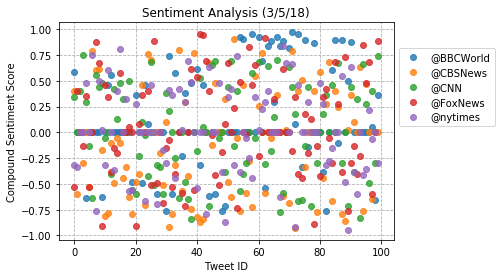

In [181]:

for outlet in news_outlets:
    plt.plot(df['Compound Score'][df['News Outlet']==outlet],label=outlet,linestyle='None',marker='o',alpha=0.8,)
plt.legend(loc='lower left',bbox_to_anchor=(1, 0.5))
plt.xlabel('Tweet ID')
plt.ylabel('Compound Sentiment Score')
plt.title('Sentiment Analysis (3/5/18)')
plt.grid(linestyle='--')
plt.show()

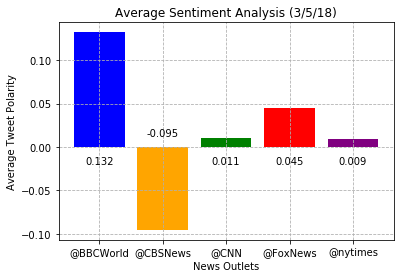

In [182]:
grouped_df = df.groupby(by='News Outlet')
color_list = ['blue','orange','green','red','purple']
bars = plt.bar([i for i in range(len(news_outlets))],grouped_df['Compound Score'].mean(),tick_label=news_outlets,color=color_list)
for bar in bars:
    if bar.get_height() > 0:
        plt.text(bar.get_x()+bar.get_width()/2,-0.01,'%.3f'%float(bar.get_height()),ha='center',va='top',color='k',fontsize=10)
    else:
        plt.text(bar.get_x()+bar.get_width()/2,0.01,'%.3f'%float(bar.get_height()),ha='center',va='bottom',color='k',fontsize=10)
plt.xlabel('News Outlets')
plt.ylabel('Average Tweet Polarity')
plt.title('Average Sentiment Analysis (3/5/18)')
plt.grid(linestyle='--')
plt.show()

In [183]:
df.to_csv('output.csv')